In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# Dataset summary
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Data preprocessing

In [5]:
# remove columns we dont need
df.drop(['name'], axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [8]:
# Drop nulls
df.dropna(inplace=True)
df.isnull().sum().any()

np.False_

In [9]:
df.shape

(392, 8)

In [10]:
# fix model year
df['model_year'] = (1900 + df.model_year)

### Univariate analysis
- Observing characteristics of the variables individually

In [11]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [12]:
df['cylinders'].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

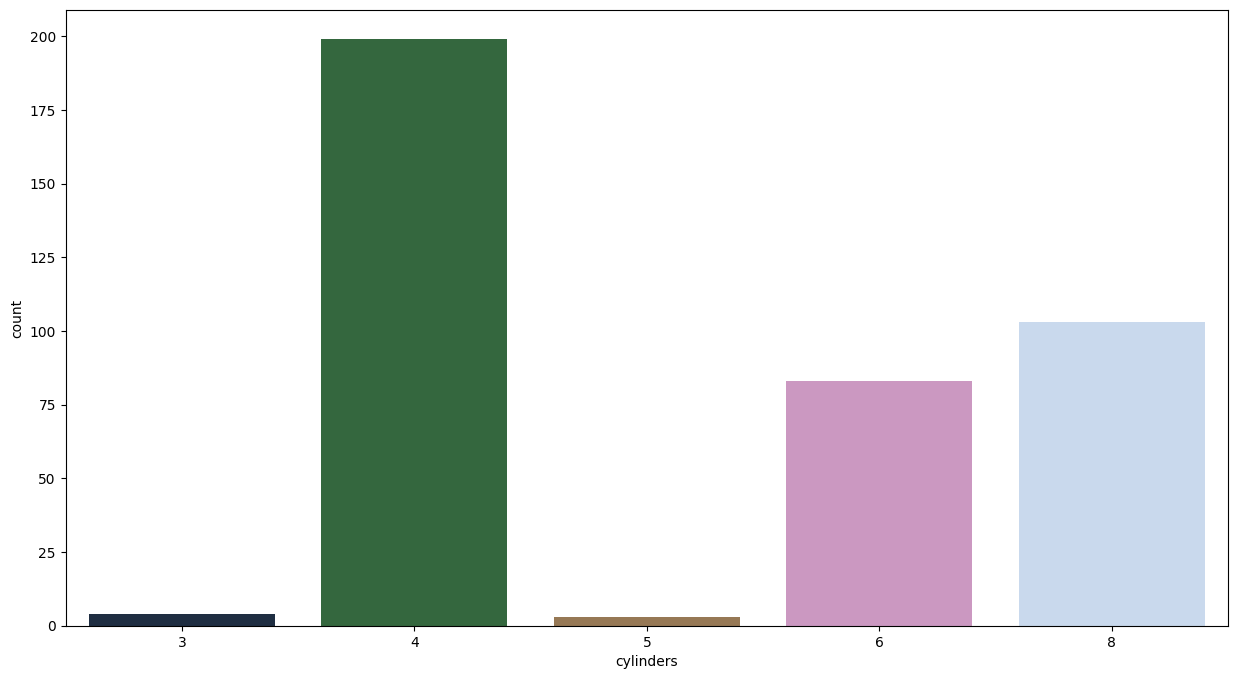

In [13]:
plt.figure(figsize= (15,8))
sns.countplot(x=df['cylinders'], data = df, palette='cubehelix')
plt.show()
# most cars have 4 cylinders

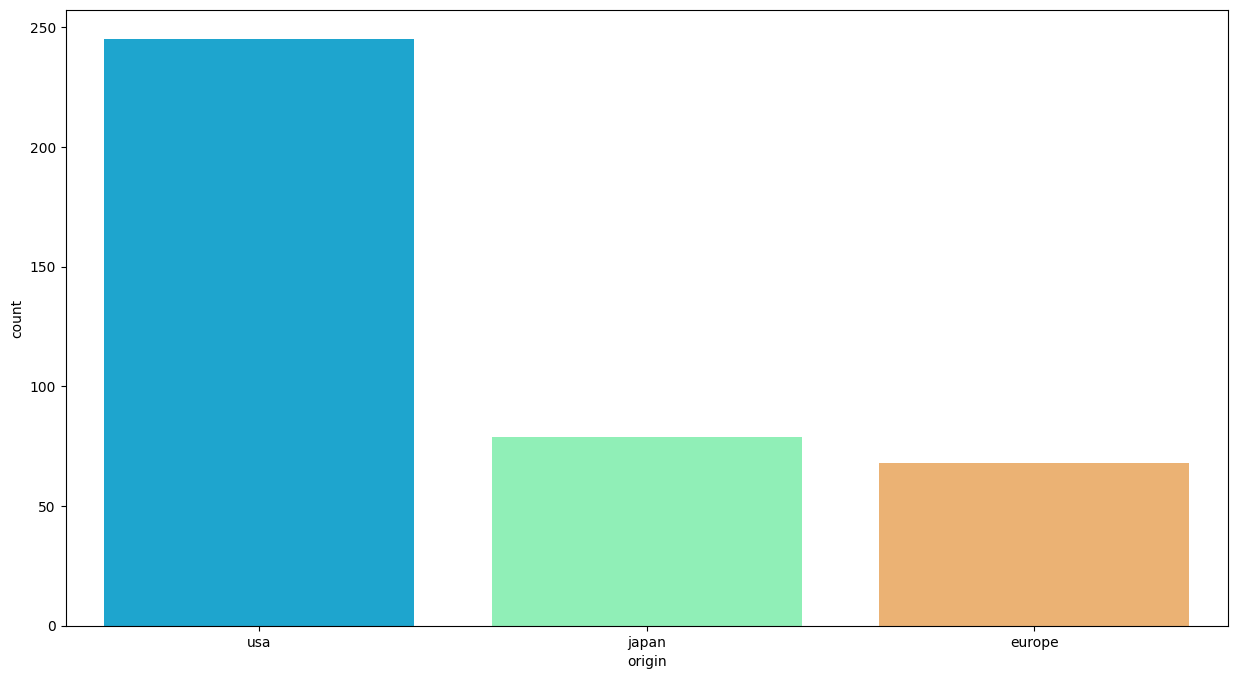

In [14]:
plt.figure(figsize= (15,8))
sns.countplot(x=df['origin'], data = df, palette='rainbow')
plt.show()
# most cars are from the usa

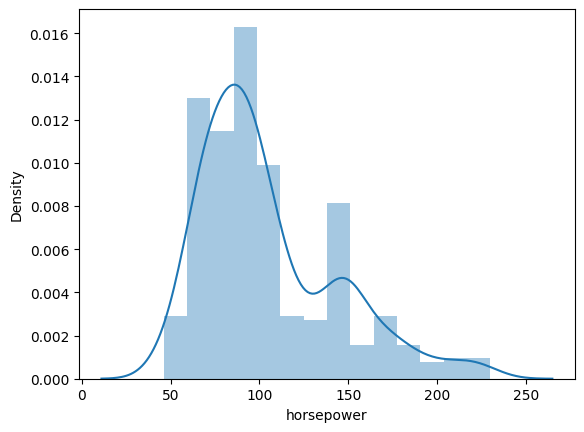

In [15]:
sns.distplot(df['horsepower'])
plt.show()
# right skew

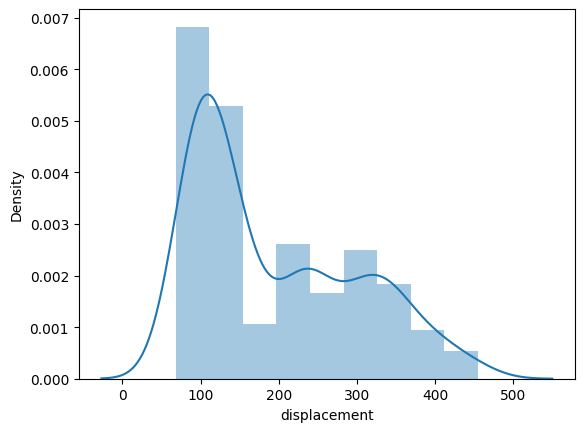

In [16]:
sns.distplot(df['displacement'])
plt.show()
# peak at around 100 and decreases gradually after 200

### Bivariate Analysis

- Observing the interrelationship characteristics of variables

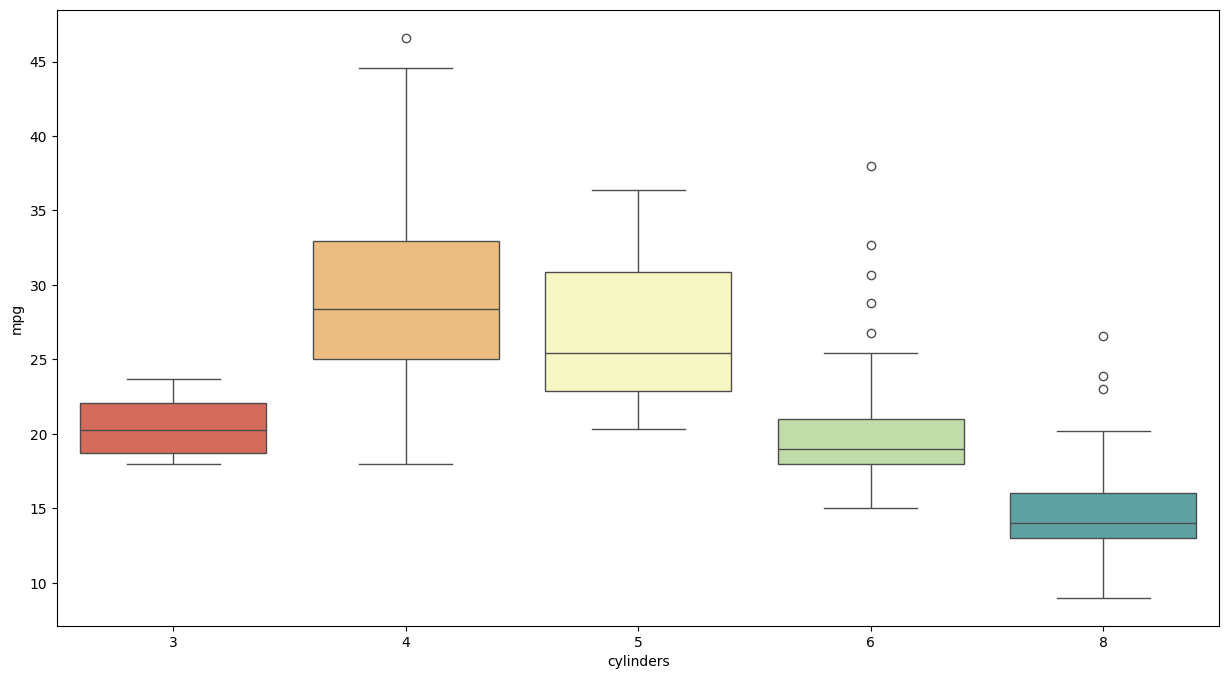

In [17]:
plt.figure(figsize= (15,8))
sns.boxplot(x=df['cylinders'], y = df['mpg'], data = df, palette='Spectral')
plt.show()

- *mpg value decreases as the number od cylinders increase*
- *the lower the mpg, the more fuel the vehicle will consume*

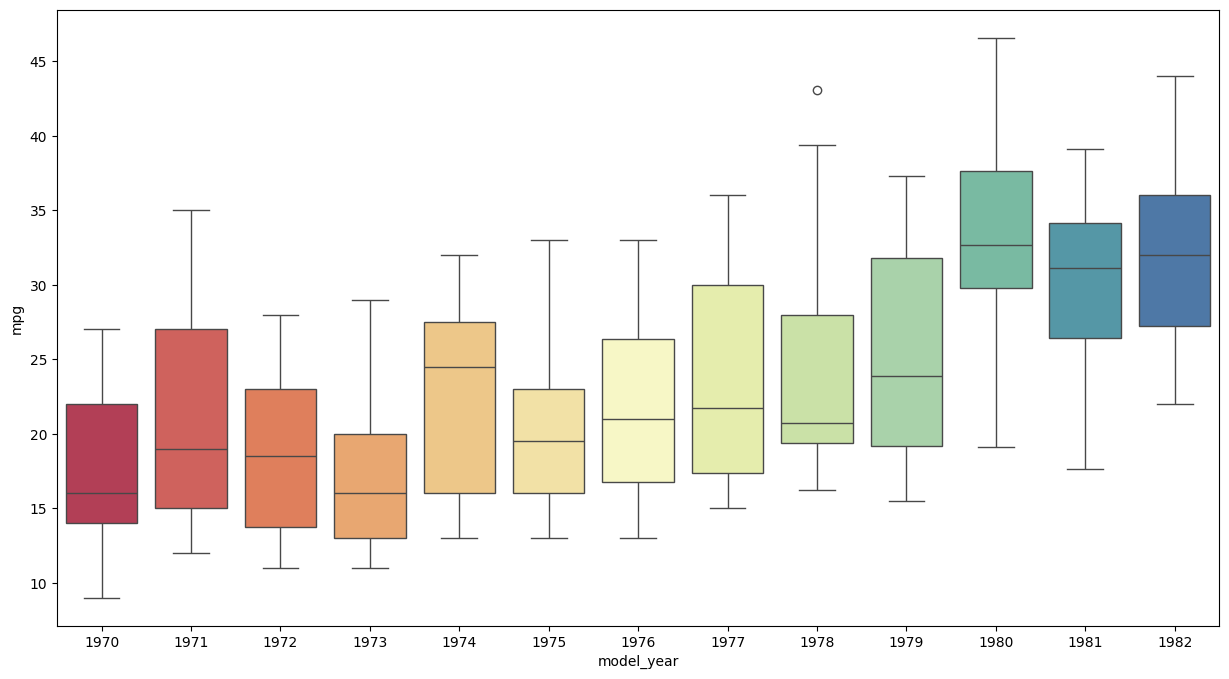

In [18]:
plt.figure(figsize= (15,8))
sns.boxplot(x=df['model_year'], y = df['mpg'], data = df, palette='Spectral')
plt.show()

- *the mpg values increase with newer models*

### Multivariate Analysis

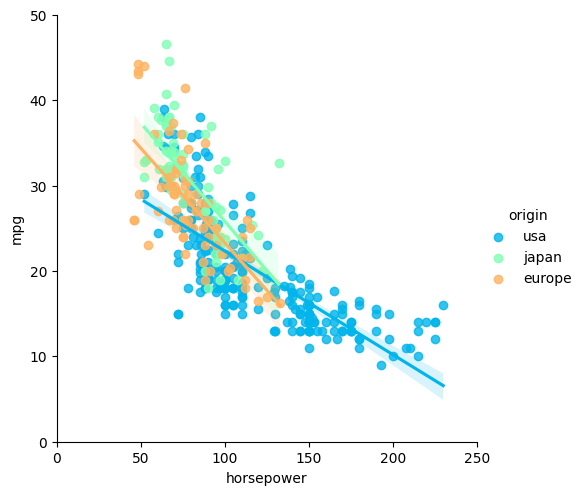

In [19]:
graph = sns.lmplot(x='horsepower', y= 'mpg', hue='origin', data=df, palette='rainbow')
graph.set(xlim =(0, 250))
graph.set(ylim =(0, 50))
plt.show()

- *mpg value decreases with increasing horsepower*
- *softest reductions occur in usa models*
- *decrease in japanese and european cars is pretty much the same*

**Heatmap of correlation matrix**

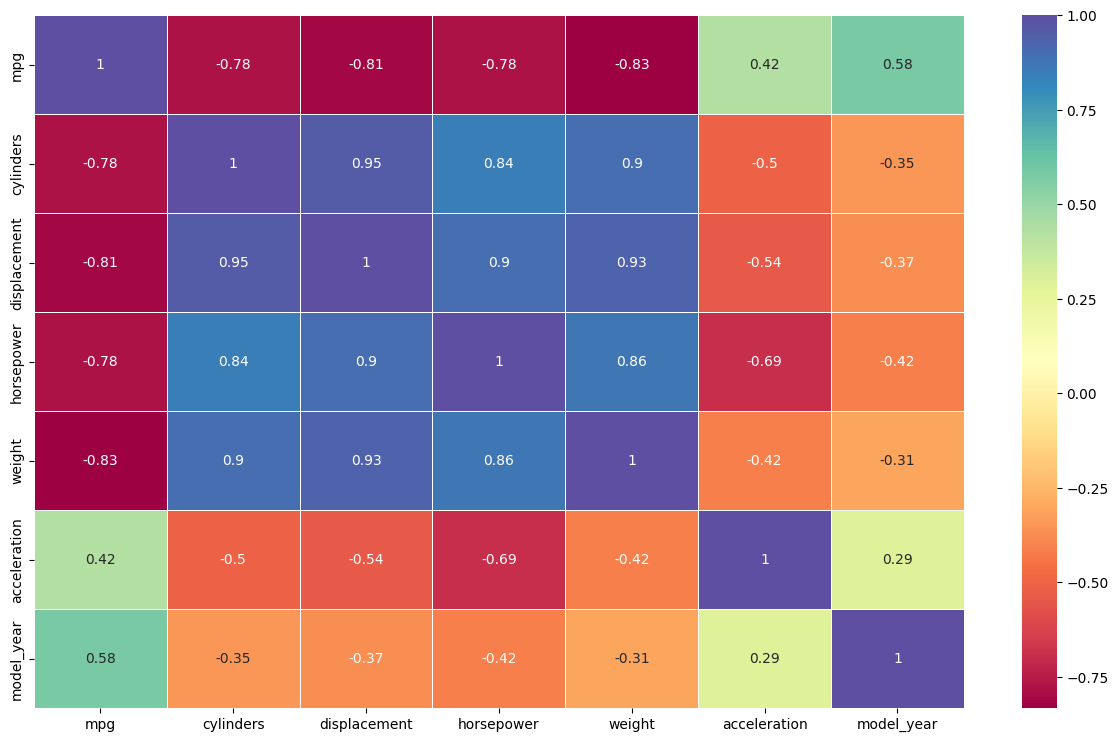

In [22]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

In [23]:
df.drop(['displacement', 'acceleration'], axis=1, inplace=True)

In [ ]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [ ]:
from datetime import datetime
this_year = datetime.today().year
this_year

2024

In [33]:
df['age'] = this_year - df['model_year'] 
df.drop(['model_year'], axis=1, inplace=True)
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [34]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [35]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,False,True
1,15.0,8,165.0,3693,54,False,True
2,18.0,8,150.0,3436,54,False,True
3,16.0,8,150.0,3433,54,False,True
4,17.0,8,140.0,3449,54,False,True


### Modeling

In [36]:
x = df.drop(['mpg'], axis=1)
y = df['mpg']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
x_test

,cylinders,horsepower,weight,age,origin_japan,origin_usa
79,4,69.0,2189,52,False,False
276,4,115.0,2795,46,False,False
248,4,60.0,1800,46,True,False
56,4,70.0,1955,53,False,True
393,4,86.0,2790,42,False,True
...,...,...,...,...,...,...
366,6,85.0,3465,43,False,True
83,4,80.0,2164,52,False,True
115,8,145.0,4082,51,False,True
3,8,150.0,3433,54,False,True


In [44]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create linear regression object
lm_model = LinearRegression()

In [46]:
lm_model.fit(x_train, y_train)

LinearRegression()

In [49]:
# y value when the variables are at zero
lm_model.intercept_

np.float64(79.80442103966973)

In [50]:
coef_param = pd.DataFrame(lm_model.coef_, index=x.columns, columns=['Coefficient'])
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [51]:
y_pred = lm_model.predict(x_test)

In [53]:
test_dict = {'Actual': y_test, 'Predicted': y_pred}
test_df = pd.DataFrame(test_dict)
test_df.sample(12)

,Actual,Predicted
167,29.0,29.305004
255,25.1,25.528786
183,25.0,29.317483
73,13.0,13.173142
15,22.0,18.949298
56,26.0,24.706647
47,19.0,17.086203
157,15.0,13.341425
210,19.0,25.676064
307,26.8,26.447530


**Evaluation metrics**

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred) # ability of independent variables to explain dependent variables
    return print(f'r2_score: {SCORE}\nmae: {MAE}\nmse: {MSE}\nrmse: {RMSE}')

In [58]:
eval_metrics(y_test, y_pred)

r2_score: 0.7798249880881913
mae: 2.518828157615086
mse: 11.23786102282303
rmse: 3.3522919059686656
